[Indice](index.ipynb) | Previo: [FormalismoLagrangiano.FuncionLagrangiana](09.03.00.00.FormalismoLagrangiano.FuncionLagrangiana.ipynb) | Siguiente: [FormalismoLagrangiano.Simetrias](09.05.00.00.FormalismoLagrangiano.Simetrias.ipynb)

## 9.6. El principio de Hamilton
<a id='principio_hamilton'></a>

En la sección anterior vimos que para un sistema dinámico con Lagrangiano $L$, las ecuaciones de Lagrange adoptan la forma particular de las ecuaciones de Euler-Lagrange:

$$
\left\{ \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{q}_j} \right) - \frac{\partial L}{\partial q_j} =  0\right\}_M
$$

Ya habíamos visto una ecuación analoga a estas en la [Sección *Funcionales y cálculo de variaciones*](04.01.04.00.Fundamentos.Calculo.CalculoVariacional.ipynb#funcionales_calculo_variaciones).  Allí nos habíamos preguntado cuál era la función $f(t)$ que un intervalo $[a,b]$, hacía mínimo el funcional:

\begin{equation}
\label{eq:funcional_calculo_variacional}
I[f]=\int_a^b L(f(t),\dot{f}(t),t)\;\mathrm{d}t
\end{equation}
donde $L(f(t),\dot{f}(t),t)$, en aquel contexto, era una función de los valores de $f(t)$ y sus derivadas en el intervalo de integración.  Aplicando los métodos del cálculo variacional encontramos que la función en cuestión debía satisfacer la ecuación:

$$
\frac{\partial L}{\partial f}-\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot{f}}=0
$$

Si bien el ejemplo desarrollado en aquel capítulo, aplicaba solo para encontrar una sola función $f(t)$, no es difícil generalizarlo al caso más general de la mecánica, en el que tenemos que encontrar $M$ funciones $\{q_j(t)\}$ y donde el papel de la función $L$ en la Ec. ([funcional_calculo_variacional](#mjx-eqn-eq%3Afuncional_calculo_variacional)) lo juega el mismo Lagrangiano.  Más interesante aún es reconocer el hecho de que las ecuaciones de Euler-Lagrange de la mecánica que derivamos antes en este capítulo comenzando con el principio de d'Alambert-Lagrange, pueden en realidad obtenerse a partir de un principio físico distinto y completamente nuevo:

> **Principio: Principio de Hamilton**.  La evolución de un sistema dinámico con lagrangiano $L$ entre dos instantes $t_1$ y $t_2$ es tal que la **integral de acción** o simplemente **acción.**<a id=''></a> , 

> $$S\equiv\int_{t_1}^{t_2}L(\{q_j(t)\},\{\dot q_j(t)\},t)\;\mathrm{d}t$$
> tiene un valor estacionario (es máximo, mínimo o corresponde a un punto de inflexión) cuando es evaluada a lo largo de la trayectoria real del sistema en el espacio de configuración y que denotaremos como $\{q^0_j(t)\}$.  En la notación del cálculo variacional:

> $$\left.\delta S\right|_{\{q^0_j(t)\}} = \left.\delta\left(\int_{t_1}^{t_2}L\;\mathrm{d}t\right)\right|_{\{q^0_j(t)\}} = 0$$

> Por la misma razón a este principio se lo llama también **principio de acción estacionaria**.

El principio de Hamilton es un principio geométrico cuyo profundo significado físico no puede menospreciarse.  La primera consecuencia de este principio es que si la acción es estacionaria, entonces el lagrangiano del sistema dinámico $L=T-U$ satisface las ecuaciones de Euler-Lagrange:

$$
\left\{ \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{q}^0_j} \right) - \frac{\partial L}{\partial q^0_j} =  0\right\}_M
$$
que sabemos (lo hemos ilustrado con varios ejemplos) son equivalentes a la aplicación de las leyes de Newton sobre el sistema.  Es decir, las sacrosantas leyes de Newton, que sabemos fueron inspiradas originalmente por intuiciones basadas en experiencias mecánicas, a la luz de este principio tienen en realidad una profunda base geométrica.

La mecánica, formulada a partir del principio de Hamilton, muestra además el papel central que juega el Lagrangiano en la determinación de toda la dinámica del sistema.  El lagrangiano está en el corazón de la acción, $S=\int L\;\mathrm{d}t$ que es justamente la cantidad física que es estacionaria a lo largo de la trayectoria del sistema.  Para ponerlo en términos analógicos, todas las propiedades y simetrías de $L$ se verán reflejadas en el camino que siga el sistema en el espacio de configuración.  En las siguientes secciones nos ocuparemos justamente de estudiar esas propiedades y simetrías del Lagrangiano que nos permitirán intuir las propiedades de los sistemas dinámicos incluso antes de escribir explícitamente las ecuaciones de movimiento.

### 9.6.1. Un ejemplo: el péndulo simple
<a id='hamilton_pendulo_simple'></a>

Como es costumbre en el libro, para afinar nuestra intución sobre el principio de Hamilton, pongamosle algunos números a las cantidades y fórmulas que dedujimos en la sección anterior.  Este ejercicio particular, posiblemente no nos ayudará a resolver un problema dinámico específico en tanto la formulación de las ecuaciones de Euler-Lagrange y la solución de las ecuaciones de movimiento resultantes son con mucho la manera más efectiva de hacerlo.  Aún así al intentar convertir estas ideas en algorítmos podemos hacernos a una idea más clara de las cantidades y relaciones involucradas.

Consideremos para ello el sistema físico más sencillo que introdujimos en las secciones anteriores: el pénulo simple.  No es difícil encontrar el Lagrangiano de este sistema usando como variable generalizada el ángulo $q$ de la cuerda respecto de la vertical:

$$
L_\mathrm{PS}=\frac{1}{2}m L^2 \dot q^2 - m g L \cos q
$$
donde $L$ es la longitud del péndulo.  Usando este lagrangiano podemos definir la acción en el sistema en un intervalo de tiempo arbitrario:

$$
S_\mathrm{PS}(t)=\int_{t_1}^{t_2} L_\mathrm{PS}\;\mathrm{d}t
$$

La primera pregunta que podemos formularnos en el contexto del principio de Hamilton es: ¿cómo varía la acción de este sistema en las vecindades de una trayectoria de referencia $q_0(t)$ en el espacio de configuración?

Primero implementemos el cálculo del lagrangiano como una rutina:

In [584]:
#Valor global de la aceleración de la gravedad
g=9.81

#Ruina del lagrangiano del péndulo simple
def lagrangiano_pendulo_simple(q,dqdt,t,teta0=0,m=1,L=1):
    from numpy import cos
    L_PS=0.5*m*L**2*dqdt**2-m*g*L*cos(q)
    return L_PS

A continuación debemos definir nuestra función de referencia. Es razonable, sin resolver la ecuación de movimiento del sistema, suponer que la solución se encontrará cerca a:

\begin{equation}
\label{eq:PS_funcion_referencia}
q_0(t)=\theta_0\cos(\omega t)
\end{equation}
donde $\omega=\sqrt{g/L}$ y $\theta_0$ es el valor inicial de la variable $q$.  Podemos implementar esta función como una rutina:

In [585]:
def q0_pendulo_simple(t,teta0=0,m=1,L=1):
    from numpy import sqrt,cos
    w=sqrt(g/L)
    q=teta0*cos(w*t)
    return q

Es importante que los parámetros opcionales de la rutina `lagrangiano_pendulo_simple` y `q0` sean exactamente los mismos por razones que mostraremos más adelante.

Ahora neceistamos una función de plantilla $\eta(t)$ (tal que $\eta(t_1)=\eta(t_2)=0$) que cuantifique la desviación de una trayectoria de prueba $q(t)$ respecto a la trayectoria de referencia $q_0(t)$:

$$
q(t)=q_0(t)+\epsilon \eta(t)
$$
donde $\epsilon$ es un valor real arbitrario.  

Una elección adecuada para la función plantilla es, como lo hicimos en la [Sección *Funcionales y cálculo de variaciones*](04.01.04.00.Fundamentos.Calculo.CalculoVariacional.ipynb#funcionales_calculo_variaciones), la función seno:

$$
\eta(t)=\sin(\omega t/2)
$$
Esta función es cero solamente en los extremos del intervalo de interés, que asumiremos esta entre $t_1=0$ y $t_2=2\pi/\omega$.  La función plantilla también se implementa en el siguiente algoritmo:

In [586]:
def eta_pendulo_simple(t,teta0=0,m=1,L=1):
    from numpy import sqrt,sin
    w=sqrt(g/L)
    eta=sin(w*t/2)
    return eta

Con estos elementos solo nos queda implementar el cálculo de la acción.  Para ello podemos definir una rutina general que permita determinar la acción dado cualquier lagrangiano, función de referencia y función plantilla.  En el siguiente algoritmo, que se construye usando como modelo el [funcional_calculo_variacional](#mjx-eqn-eq%3Afuncional_calculo_variacional)([funcional_integral](04.01.04.00.Fundamentos.Calculo.CalculoVariacional.ipynb#code:funcional_integral)), se define una rutina que calcula esta función acción:

<a id='code:accion_general'></a>

In [587]:
def accion_hamilton(lagrangiano,q0,eta,epsilon,t1,t2,**opciones_de_L):
    
    #Definimos las función con su variación
    q=lambda t:q0(t,**opciones_de_L)+epsilon*eta(t,**opciones_de_L)
    
    #La derivada de q la calculamos con derivative
    from scipy.misc import derivative
    dqdt=lambda t:derivative(q,t,0.01)
        
    #Lagrangiano del péndulo simple
    Lsistema=lambda t:lagrangiano(q(t),dqdt(t),t,**opciones_de_L)

    #El funcional es la integral definida del integrando
    from scipy.integrate import quad
    integral=quad(Lsistema,t1,t2)
    S=integral[0]
    
    return S

Con todos estos elementos a la mano, podemos ahora calcular el valor de la acción, por ejemplo, a lo largo de la trayectoria de referencia; esto es, usando $\epsilon=0$:

In [588]:
#Propiedades del sistema
longitud=1
masa=1

#Condición inicial
from numpy import pi,sqrt
teta0=pi/3

#Parametro omega
w=sqrt(g/longitud)

#Intervalo de interés
t1=0.0
t2=2*pi/w

#Valor de la accion
epsilon=0.0
S=accion_hamilton(lagrangiano_pendulo_simple,
                  q0_pendulo_simple,
                  eta_pendulo_simple,
                  epsilon,
                  t1,t2,
                  teta0=teta0,L=longitud,m=masa)

In [589]:
print(f"S_PS (epsilon = {epsilon}) = {S}")

S_PS (epsilon = 0.0) = -9.249488346756534


Un gráfico de la acción como función de $\epsilon$ se puede elaborar con este algoritmo:

In [590]:
%matplotlib nbagg

<a id='code:S_PS_epsilon'></a>

<IPython.core.display.Javascript object>


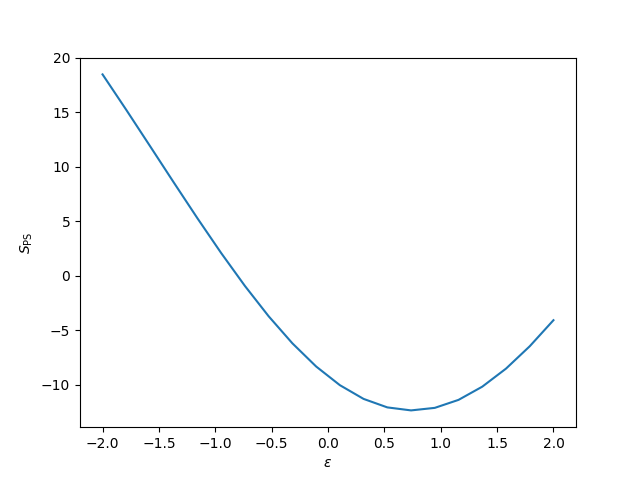

In [591]:
#Simplificamos el cálculo de la acción definiendo una función lambda
S_eps=lambda eps:accion_hamilton(lagrangiano_pendulo_simple,
                                 q0_pendulo_simple,
                                 eta_pendulo_simple,
                                 eps,
                                 t1,t2,
                                 teta0=teta0,L=longitud,m=masa)

#Valores posibles de epsilon
from numpy import linspace
eps=linspace(-2,2,20)

#Valores de la acción
S=[S_eps(epsilon) for epsilon in eps]

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(eps,S);
#Decoración
ax.set_xlabel("$\epsilon$");
ax.set_ylabel("$S_\mathrm{PS}$");

<a id='code:S_PS_epsilon'></a><center><b>Figura 9.149.</b> </center>

En la Figura ([code:S_PS_epsilon](#fig:code:S_PS_epsilon)) podemos ver que el valor de la acción no es mínimo cuando $\epsilon=0$. Es decir, la solución no es igual a la función de referencia que definimos en la Ec. ([PS_funcion_referencia](#mjx-eqn-eq%3APS_funcion_referencia)).  Para encontrar el valor exacto de $\epsilon$ podemos usar la rutina `minimize` de `SciPy`: 

In [592]:
from scipy.optimize import minimize
solucion=minimize(S_eps,0.0)

In [593]:
print(f"Resultado de la minimización:\n{solucion}")

Resultado de la minimización:
      fun: -12.371224415368705
 hess_inv: array([[0.08692453]])
      jac: array([3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([0.74565162])


Este resultado muestra que cuando el péndulo empieza en $t=0$ en una posición $\theta_0=\pi/3$, la trayectoria de mínima acción hasta $t=2\pi/\omega$ será aproximadamente:

$$
\begin{array}{lll}
q^0(t)&\approx&\theta_0\cos(\omega t)+\epsilon_\mathrm{min}\sin(\omega t/2)\\
      &\approx&\pi/3\cos(\omega t)+0.746\sin(\omega t/2)
\end{array}
$$

Es interesante anotar aquí, sin embargo, que al buscar la solución al problema usando directamente el principio de Hamilton y específicando solamente el valor inicial de la variable $q$, el valor de la velocidad inicial queda especificado por la solución.  En particular:

$$
\dot q^0(0)\approx \frac{\epsilon_\mathrm{min}\omega}{2}\approx 0.563
$$

Esto contrasta con el procedimiento tradicional de solución analítica usando las ecuaciones de Euler-Lagrange que requiere normalmente que se específique el valor inicial de la posición y de la velocidad.

Un gráfico de la trayectoria de mínima acción del péndulo y algunas trayectorias "vecinas" con un valor de la acción mayor se puede elaborar con esta algoritmo:

<a id='code:trayectoria_minima_accion'></a>

<IPython.core.display.Javascript object>


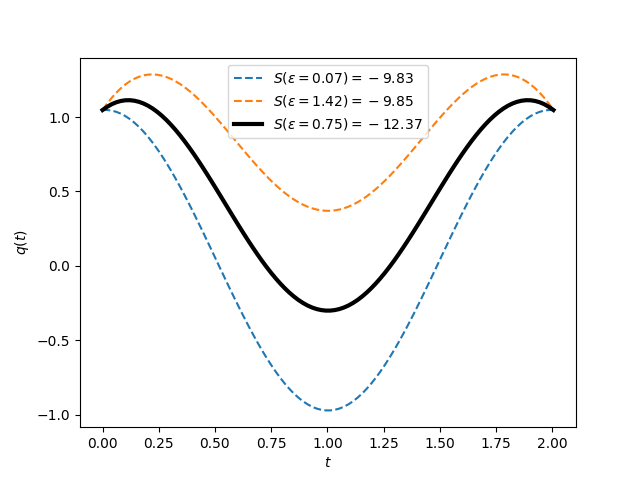

In [595]:
fig=plt.figure()
ax=fig.gca()

#Tiempos
from numpy import linspace
ts=linspace(t1,t2,100)

eps_min=solucion.x[0]
eps_men=0.1*eps_min
eps_may=1.9*eps_min
for epsilon in [eps_men,eps_may]:
    #Calcula el valor de la acción
    S=S_eps(epsilon)
    #Calculo de la función
    qs=q0_pendulo_simple(ts,teta0=teta0,m=masa,L=longitud)+\
       epsilon*eta_pendulo_simple(ts,teta0=teta0,m=masa,L=longitud)
    ax.plot(ts,qs,ls='--',
            label=f"$S(\epsilon={epsilon:.2f}) = {S:.2f}$")

epsilon=eps_min
S=S_eps(epsilon)
qs=q0_pendulo_simple(ts,teta0=teta0,m=masa,L=longitud)+\
   epsilon*eta_pendulo_simple(ts,teta0=teta0,m=masa,L=longitud)
ax.plot(ts,qs,'k-',lw=3,label=f"$S(\epsilon={epsilon:.2f}) = {S:.2f}$")

#Decoración
ax.legend()
ax.set_xlabel("$t$");
ax.set_ylabel("$q(t)$");

<a id='code:trayectoria_minima_accion'></a><center><b>Figura 9.150.</b> </center>

¿Es en realidad la trayectoria mostrada en la Figura ([code:trayectoria_minima_accion](#fig:code:trayectoria_minima_accion)) la solución al problema del péndulo simple? ¡No necesariamente!.  A lo sumo lo que podemos decir es que la trayectoria real del sistema que pasa por $t_1=0,q(t_1)=\pi/3$ y $t=2\pi/\omega,q(t_2)=\pi/3$ es cercana a esa curva.  Tan cercana como no lo permite nuestra función de referencia y la plantilla que usamos.

[Indice](index.ipynb) | Previo: [FormalismoLagrangiano.FuncionLagrangiana](09.03.00.00.FormalismoLagrangiano.FuncionLagrangiana.ipynb) | Siguiente: [FormalismoLagrangiano.Simetrias](09.05.00.00.FormalismoLagrangiano.Simetrias.ipynb)